In [6]:
import numpy as np
import matplotlib.pyplot as plt
from gammatone.gtgram import make_erb_filters, erb_filterbank
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange, array, max, min
from numpy.linalg import norm
from numpy.random import RandomState, permutation, rand, randint, randn
from numpy import array
from numpy.random import permutation, rand, randint, randn
from pathlib import Path
import sys
sys.path.append("/mnt/d_disk/ch22b007/mdla")  # Adjust the path accordingly

from mdla import MiniBatchMultivariateDictLearning, MultivariateDictLearning

import numpy as np
import matplotlib.pyplot as plt
from gammatone.gtgram import make_erb_filters, erb_filterbank
from scipy.io import wavfile

In [9]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile

root_folder = "TEST"  # Change this to your folder path

# Recursively get all .wav files from all subdirectories
file_paths = [str(file) for file in Path(root_folder).rglob("*.wav")]

# Read all wav files and store them in a list
min_lgth = 0
wav_data = []
for file in file_paths:
    data, _ = librosa.load(file, sr=None)  # Keep original sample rate
    max_data= np.max(data)
    data /= max_data
    wav_data.append(data)
    
# Convert list to a matrix (pad shorter signals with zeros)
max_length = max(len(x) for x in wav_data)  # Find max length of any audio file
wav_matrix = np.array([np.pad(x, (0, max_length - len(x))) for x in wav_data])

print("Total WAV files found:", len(file_paths))
print("WAV Matrix shape:", wav_matrix.shape)  # (num_files, max_length)

TypeError: unsupported operand type(s) for -: 'generator' and 'int'

In [12]:
np.shape(wav_data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1680,) + inhomogeneous part.

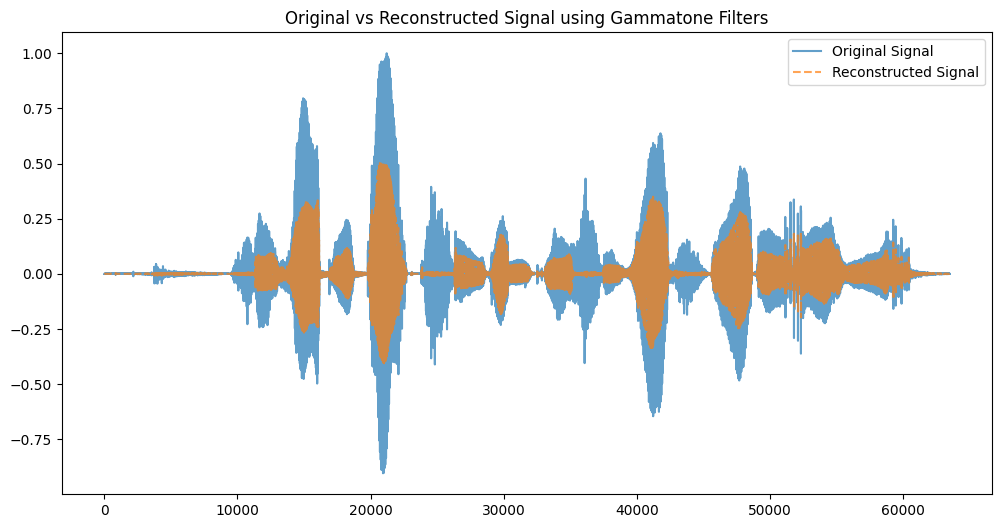

AxisError: axis 32 is out of bounds for array of dimension 0

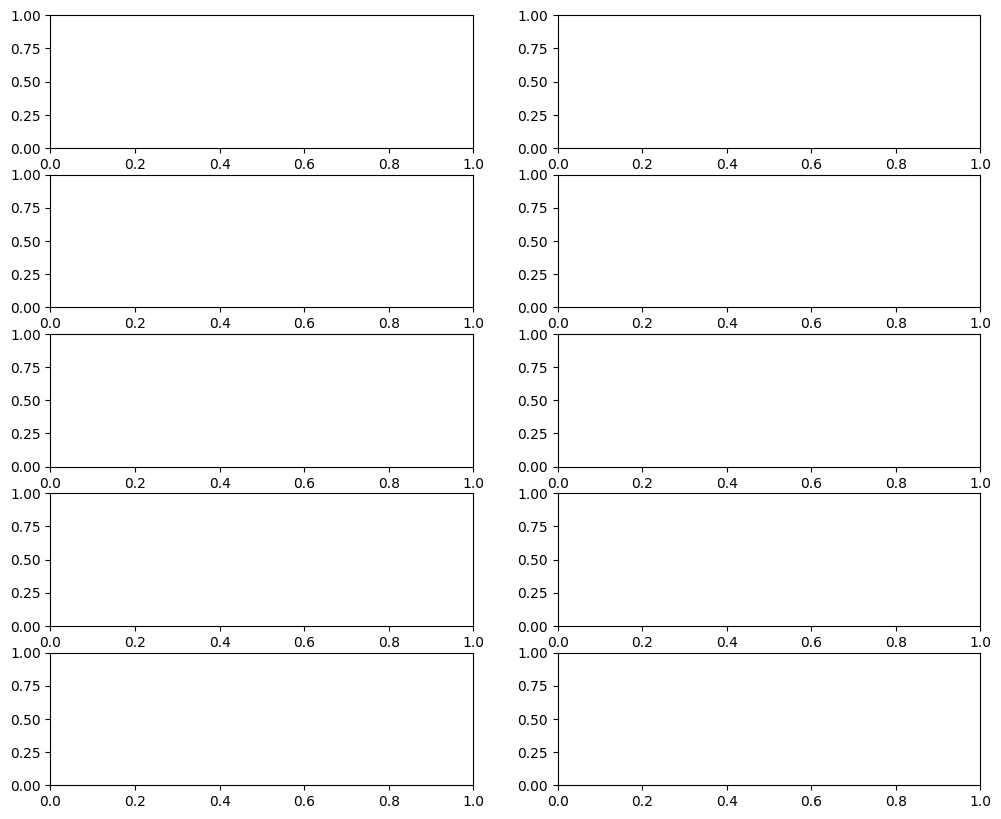

In [2]:
sample_rate, signal = wavfile.read("TEST/DR1/FAKS0/SA1.wav")

if signal.ndim > 1:
    signal = signal[:, 0]

signal = signal.astype(np.float32) / np.max(np.abs(signal))

num_filters = 32  
low_freq = 50     
high_freq = sample_rate // 2  

filters = make_erb_filters(sample_rate, num_filters, low_freq)

filtered_signals = erb_filterbank(signal, filters)

reconstructed_signal = np.sum(filtered_signals, axis=0)

if filtered_signals.shape[0] == 1:
    filtered_signals = filtered_signals.reshape(num_filters, -1)

plt.figure(figsize=(12, 6))
plt.plot(signal, label="Original Signal", alpha=0.7)
plt.plot(reconstructed_signal, label="Reconstructed Signal", linestyle="--", alpha=0.7)
plt.legend()
plt.title("Original vs Reconstructed Signal using Gammatone Filters")
plt.show()

fig, axes = plt.subplots(5, 2, figsize=(12, 10))  
axes = axes.ravel()  

for i in range(min(10, num_filters)): 
    axes[i].plot(filtered_signals[i], label=f"Filter {i+1}", alpha=0.8)
    axes[i].legend()
    axes[i].set_title(f"Gammatone Filter {i+1}")

plt.tight_layout()
plt.show()

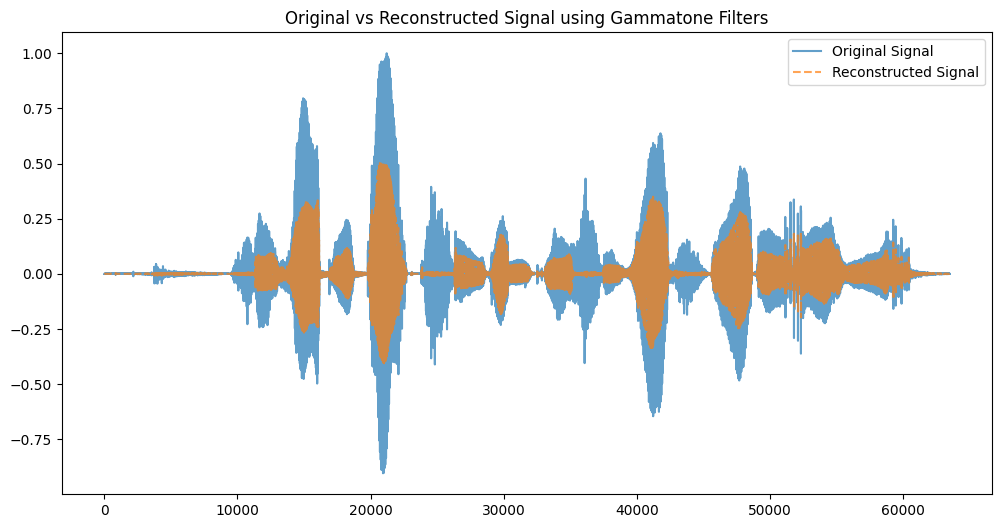

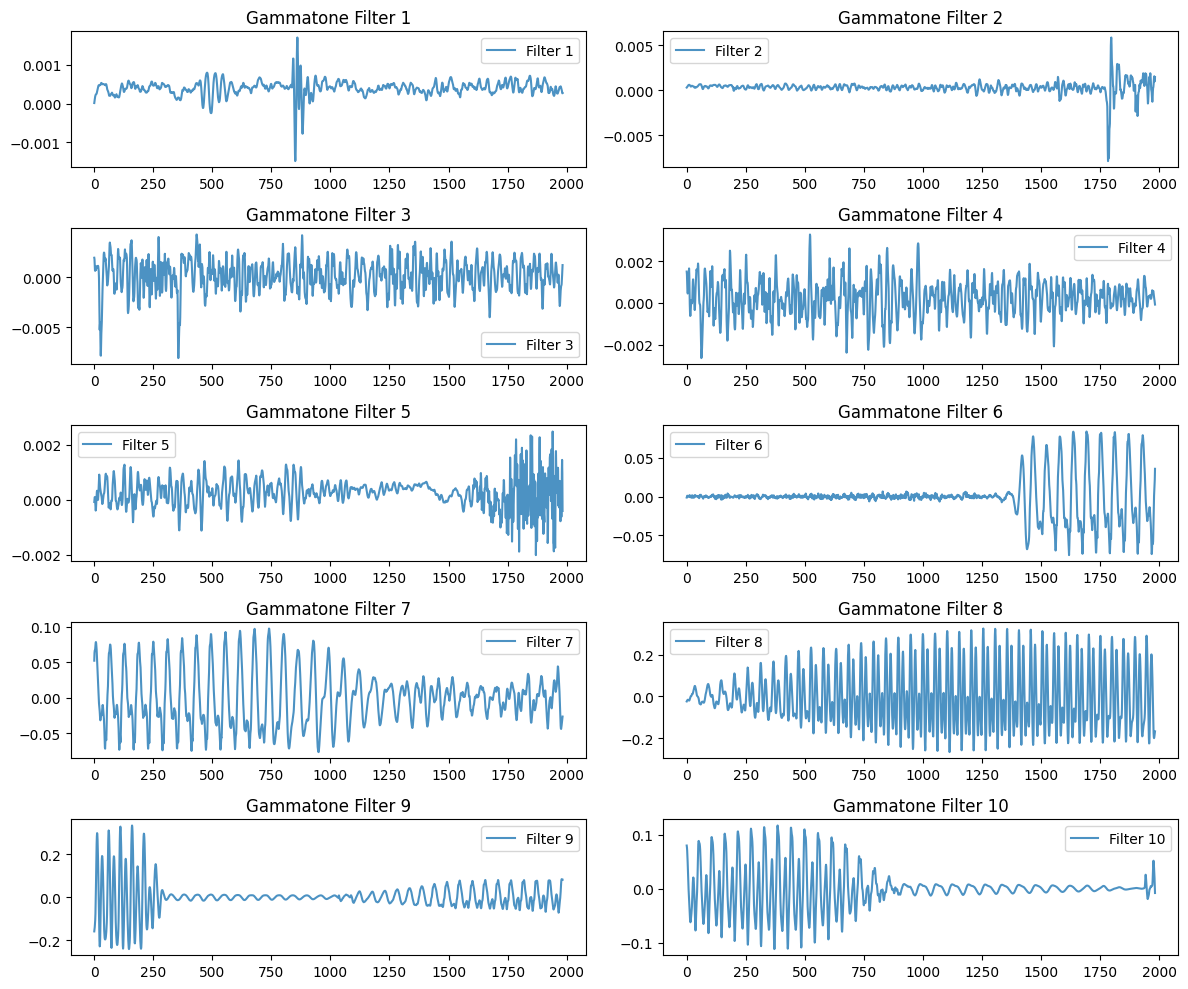

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gammatone.gtgram import make_erb_filters, erb_filterbank
from scipy.io import wavfile

sample_rate, signal = wavfile.read("TEST/DR1/FAKS0/SA1.wav")

if signal.ndim > 1:
    signal = signal[:, 0]

signal = signal.astype(np.float32) / np.max(np.abs(signal))

num_filters = 32  
low_freq = 50     
high_freq = sample_rate // 2  

filters = make_erb_filters(sample_rate, num_filters, low_freq)

filtered_signals = erb_filterbank(signal, filters)

reconstructed_signal = np.sum(filtered_signals, axis=0)

if filtered_signals.shape[0] == 1:
    filtered_signals = filtered_signals.reshape(num_filters, -1)

plt.figure(figsize=(12, 6))
plt.plot(signal, label="Original Signal", alpha=0.7)
plt.plot(reconstructed_signal, label="Reconstructed Signal", linestyle="--", alpha=0.7)
plt.legend()
plt.title("Original vs Reconstructed Signal using Gammatone Filters")
plt.show()

fig, axes = plt.subplots(5, 2, figsize=(12, 10))  
axes = axes.ravel()  

for i in range(min(10, num_filters)): 
    axes[i].plot(filtered_signals[i], label=f"Filter {i+1}", alpha=0.8)
    axes[i].legend()
    axes[i].set_title(f"Gammatone Filter {i+1}")

plt.tight_layout()
plt.show()

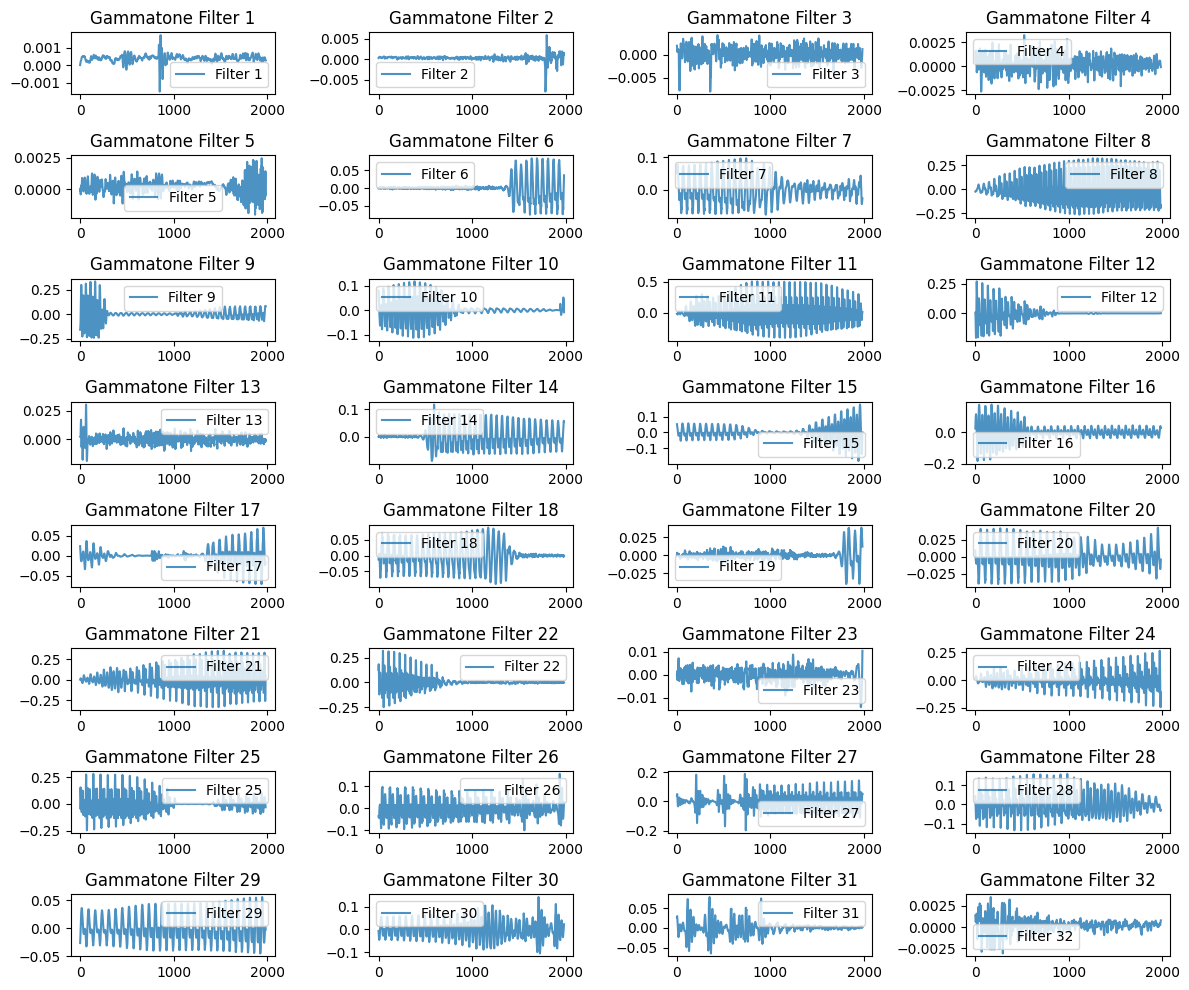

In [5]:
fig, axes = plt.subplots(8, 4, figsize=(12, 10))  
axes = axes.ravel()  

for i in range(32): 
    axes[i].plot(filtered_signals[i], label=f"Filter {i+1}", alpha=0.8)
    axes[i].legend()
    axes[i].set_title(f"Gammatone Filter {i+1}")

plt.tight_layout()
plt.show()

In [40]:
def _generate_testbed(dictionary, 
    kernel_init_len,
    n_nonzero_coefs,
    n_kernels,
    n_samples=10,
    n_features=5,
    n_dims=2,
    snr=1000,):
    """Generate a dataset from a random dictionary

    Generate a random dictionary and a dataset, where samples are combination of
    n_nonzero_coefs dictionary atoms. Noise is added, based on SNR value, with
    1000 indicated that no noise should be added.
    Return the dictionary, the dataset and an array indicated how atoms are combined
    to obtain each sample
    """
    # dico = [randn(kernel_init_len, n_dims) for i in range(n_kernels)]
    dico = [dictionary]
    # dico = dico.reshape(dico.shape[0], dico.shape[1], 1)
    # for i in range(len(dico)):
    #     dico[i] /= norm(dico[i], "fro")
    dico[0] /= norm(dico[0], "fro")
    
    signals = list()
    decomposition = list()
    for _ in range(n_samples):
        s = np.zeros(shape=(n_features, n_dims))
        d = np.zeros(shape=(n_nonzero_coefs, 3))
        rk = permutation(range(n_kernels))
        for j in range(n_nonzero_coefs):
            k_idx = rk[j]
            k_amplitude = 3.0 * rand() + 1.0
            k_offset = randint(n_features - kernel_init_len + 1)
            print(s.shape, " ", k_amplitude, " ", dico[0].shape)
            
            s[k_offset : k_offset + kernel_init_len, :] += k_amplitude * dico[k_idx].T
            d[j, :] = array([k_amplitude, k_offset, k_idx])
        decomposition.append(d)
        noise = randn(n_features, n_dims)
        if snr == 1000:
            alpha = 0
        else:
            ps = norm(s, "fro")
            pn = norm(noise, "fro")
            alpha = ps / (pn * 10 ** (snr / 20.0))
        signals.append(s + alpha * noise)
    signals = np.array(signals)

    return dico, signals, decomposition

In [41]:
rng_global = np.random.RandomState(1)
n_samples, n_dims = 1500, 2
n_features = kernel_init_len = 1984
n_nonzero_coefs = 3
n_kernels, max_iter, learning_rate = 1, 10, 1.5
n_jobs, batch_size = -1, None

iter_time, plot_separator, it_separator = list(), list(), 0

generating_dict, X, code = _generate_testbed(filtered_signals, kernel_init_len, n_nonzero_coefs, n_kernels, n_samples, n_features, n_dims)

(1984, 2)   1.316907780676393   (32, 1984)


ValueError: operands could not be broadcast together with shapes (1984,2) (1984,32) (1984,2) 

In [ ]:
filtered_signals.shape

(32, 1984)

In [ ]:
filtered_signals = filtered_signals.reshape(filtered_signals.shape[0], filtered_signals.shape[1], 1)
filtered_signals.shape

(32, 1984, 1)

In [29]:
import numpy as np
from scipy.sparse import random

dict_shape = (32, 1984)  # (num_filters, num_samples in dictionary)

time_series_length = 60000  

sparsity_level = 0.1  # Adjust sparsity (10% non-zero elements)
M = random(time_series_length, dict_shape[0], density=sparsity_level, format='csr')

M_dense = M.toarray()

print("Mixing matrix shape:", M.shape)  # Should be (60000, 32)

print("Sparsity level:", np.mean(M_dense == 0))


Mixing matrix shape: (60000, 32)
Sparsity level: 0.9


In [33]:
to_decompose = M_dense@filtered_signals
to_decompose = to_decompose.T
print(to_decompose.shape)

(1984, 60000)


In [41]:
def _generate_testbed(
    kernel_init_len,
    n_nonzero_coefs,
    n_kernels,
    n_samples=10,
    n_features=5,
    n_dims=3,
    snr=1000,
):
    """Generate a dataset from a random dictionary

    Generate a random dictionary and a dataset, where samples are combination of
    n_nonzero_coefs dictionary atoms. Noise is added, based on SNR value, with
    1000 indicated that no noise should be added.
    Return the dictionary, the dataset and an array indicated how atoms are combined
    to obtain each sample
    """
    print("Dictionary sampled from uniform distribution")
    dico = [rand(kernel_init_len, n_dims) for i in range(n_kernels)]
    for i in range(len(dico)):
        dico[i] /= norm(dico[i], "fro")

    signals = list()
    decomposition = list()
    for _ in range(n_samples):
        s = np.zeros(shape=(n_features, n_dims))
        d = np.zeros(shape=(n_nonzero_coefs, 3))
        rk = permutation(range(n_kernels))
        for j in range(n_nonzero_coefs):
            k_idx = rk[j]
            k_amplitude = 3.0 * rand() + 1.0
            k_offset = randint(n_features - kernel_init_len + 1)
            s[k_offset : k_offset + kernel_init_len, :] += k_amplitude * dico[k_idx]
            d[j, :] = array([k_amplitude, k_offset, k_idx])
        decomposition.append(d)
        noise = randn(n_features, n_dims)
        if snr == 1000:
            alpha = 0
        else:
            ps = norm(s, "fro")
            pn = norm(noise, "fro")
            alpha = ps / (pn * 10 ** (snr / 20.0))
        signals.append(s + alpha * noise)
    signals = np.array(signals)

    return dico, signals, decomposition


rng_global = np.random.RandomState(1)
n_samples, n_dims = 1500, 1
n_features = kernel_init_len = 5
n_nonzero_coefs = 3
n_kernels, max_iter, learning_rate = 50, 10, 1.5
n_jobs, batch_size = -1, None

iter_time, plot_separator, it_separator = list(), list(), 0

generating_dict, X, code = _generate_testbed(
    kernel_init_len, n_nonzero_coefs, n_kernels, n_samples, n_features, n_dims
)

# Online without mini-batch
print(
    "Processing ",
    max_iter,
    "iterations in online mode, " "without multiprocessing:",
    end="",
)
batch_size, n_jobs = n_samples, 1
learned_dict = MiniBatchMultivariateDictLearning(
    n_kernels=n_kernels,
    batch_size=batch_size,
    n_iter=max_iter,
    n_nonzero_coefs=n_nonzero_coefs,
    n_jobs=n_jobs,
    learning_rate=learning_rate,
    kernel_init_len=kernel_init_len,
    verbose=1,
    dict_init=None,
    random_state=rng_global,
)
learned_dict_1 = learned_dict.fit(X)

Dictionary sampled from uniform distribution
Processing  10 iterations in online mode, without multiprocessing:
[dict_learning] ..Expecting this learning iterations to finish in 0.93 m
........

ValueError: x and y can be no greater than 2D, but have shapes (50,) and (50, 5, 2)

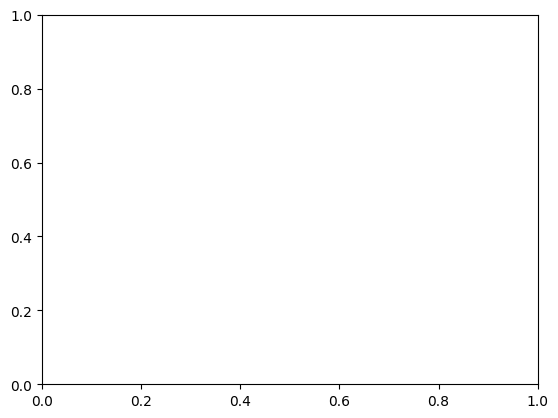

In [22]:
plt.plot(learned_dict_1.kernels_)

In [24]:
learned_dict_1.kernels_[0]

array([[ 0.26914214,  0.00305346],
       [ 0.36364443, -0.01609403],
       [ 0.1758838 ,  0.33958864],
       [-0.32051333,  0.45286649],
       [-0.12452007,  0.57050788]])

In [33]:
# generating_dict, X, code
len(X[:])

1500

In [34]:
X.shape

(1500, 5, 2)

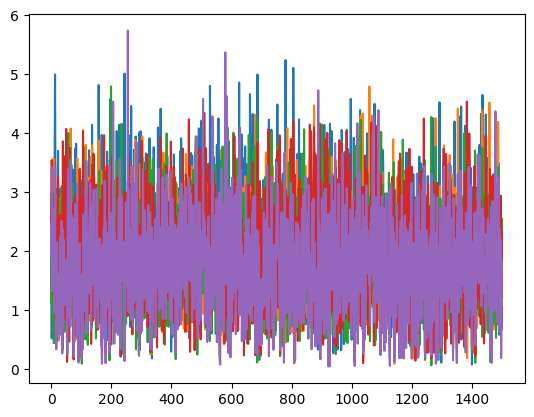

In [36]:
plt.plot(X[:, :, 0])

In [39]:
filtered_signals.shape

(32, 1984)